## Import Libraries and Data Files 

In [64]:
%run setup.ipynb

## Load Dataframe

In [65]:
dev_df = merged_df.loc[((merged_df['Year'] <= 2023) & merged_df['Division'].str.contains('DHPSG|DHGP'))]

print(len(dev_df))

362


In [66]:
# create dataframe of competitors from 2002-2023
total_dev_horses = merged_df.loc[(merged_df['Year'] <= 2023) &
                             (merged_df['Division'].str.contains('DHPSG|DHGP'))]

# drop duplicate USDF numbers so we only count each horse once
total_dev_horses = total_dev_horses.drop_duplicates(subset=['USDFNumber'])

total_dev_horses

,Year,Division,Horse,OverallPlacing,USDFNumber,OverallScore,Highest Level,CDI Competitor,Sire,Damsire,Country Bred,Breeder,Studbook,InternationalTeam,Team Made
17,2008,DHPSG,Sir Sinclair,12,1015413,62.947,Prix St. Georges,No,Lord Sinclair,Flemmingh,Netherlands,Monica Drohm,KWPN,No,NaN
40,2007,DHPSG,Rykaard,8,43275,63.083,I-1,Yes,Kimberley,Caruso,Netherlands,J. J. Knijp,KWPN,No,NaN
55,2008,DHPSG,Currency DC,10,1035693,63.859,Grand Prix,Yes,Clintino,Classiker,Germany,Zuchterhof Klatte,Oldenburg,No,NaN
62,2008,DHPSG,Wolkenwand,7,1019513,64.414,Grand Prix,No,Wolkenstein II,Walt Disney I,Germany,Bernd Meyer,Hanoverian,No,NaN
72,2008,DHPSG,Carnegie,14,39789,62.107,I-1,Yes,Contucci,Martini,USA,Zada Steidl,Oldenburg,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2023,DHPSG,Jim,6,1129586,67.494,I-2,No,Ferdeaux,Spielberg,Netherlands,A.Soethout,KWPN,No,NaN
1192,2023,DHPSG,Furst Romanov,7,1144894,66.455,I-2,Yes,First Choice,Romanov,Denmark,Inge Bastian,Oldenburg,No,NaN
1194,2023,DHPSG,Giovanni-Bell,10,1157255,43.333,Prix St. Georges,No,Grand Galaxy Win,Maat I,Denmark,Tina Jepsen,Danish Warmblood,No,NaN
1195,2023,DHPSG,S Express,11,1158953,39.778,I-1,Yes,Sezuan,Sir Donnerhall I,Germany,Cathrin Schlemper,Westfalen,No,NaN


In [ ]:
total_dev_horses.describe()

In [67]:
# get number of horses over all years of the program (2002-2023)
dev_horse_count = len(total_dev_horses)

print(f"The total number of horses competing over all years is {dev_horse_count}.")

The total number of horses competing over all years is 283.


### Breakdown of Competitors by Highest Level of Competition Achieved

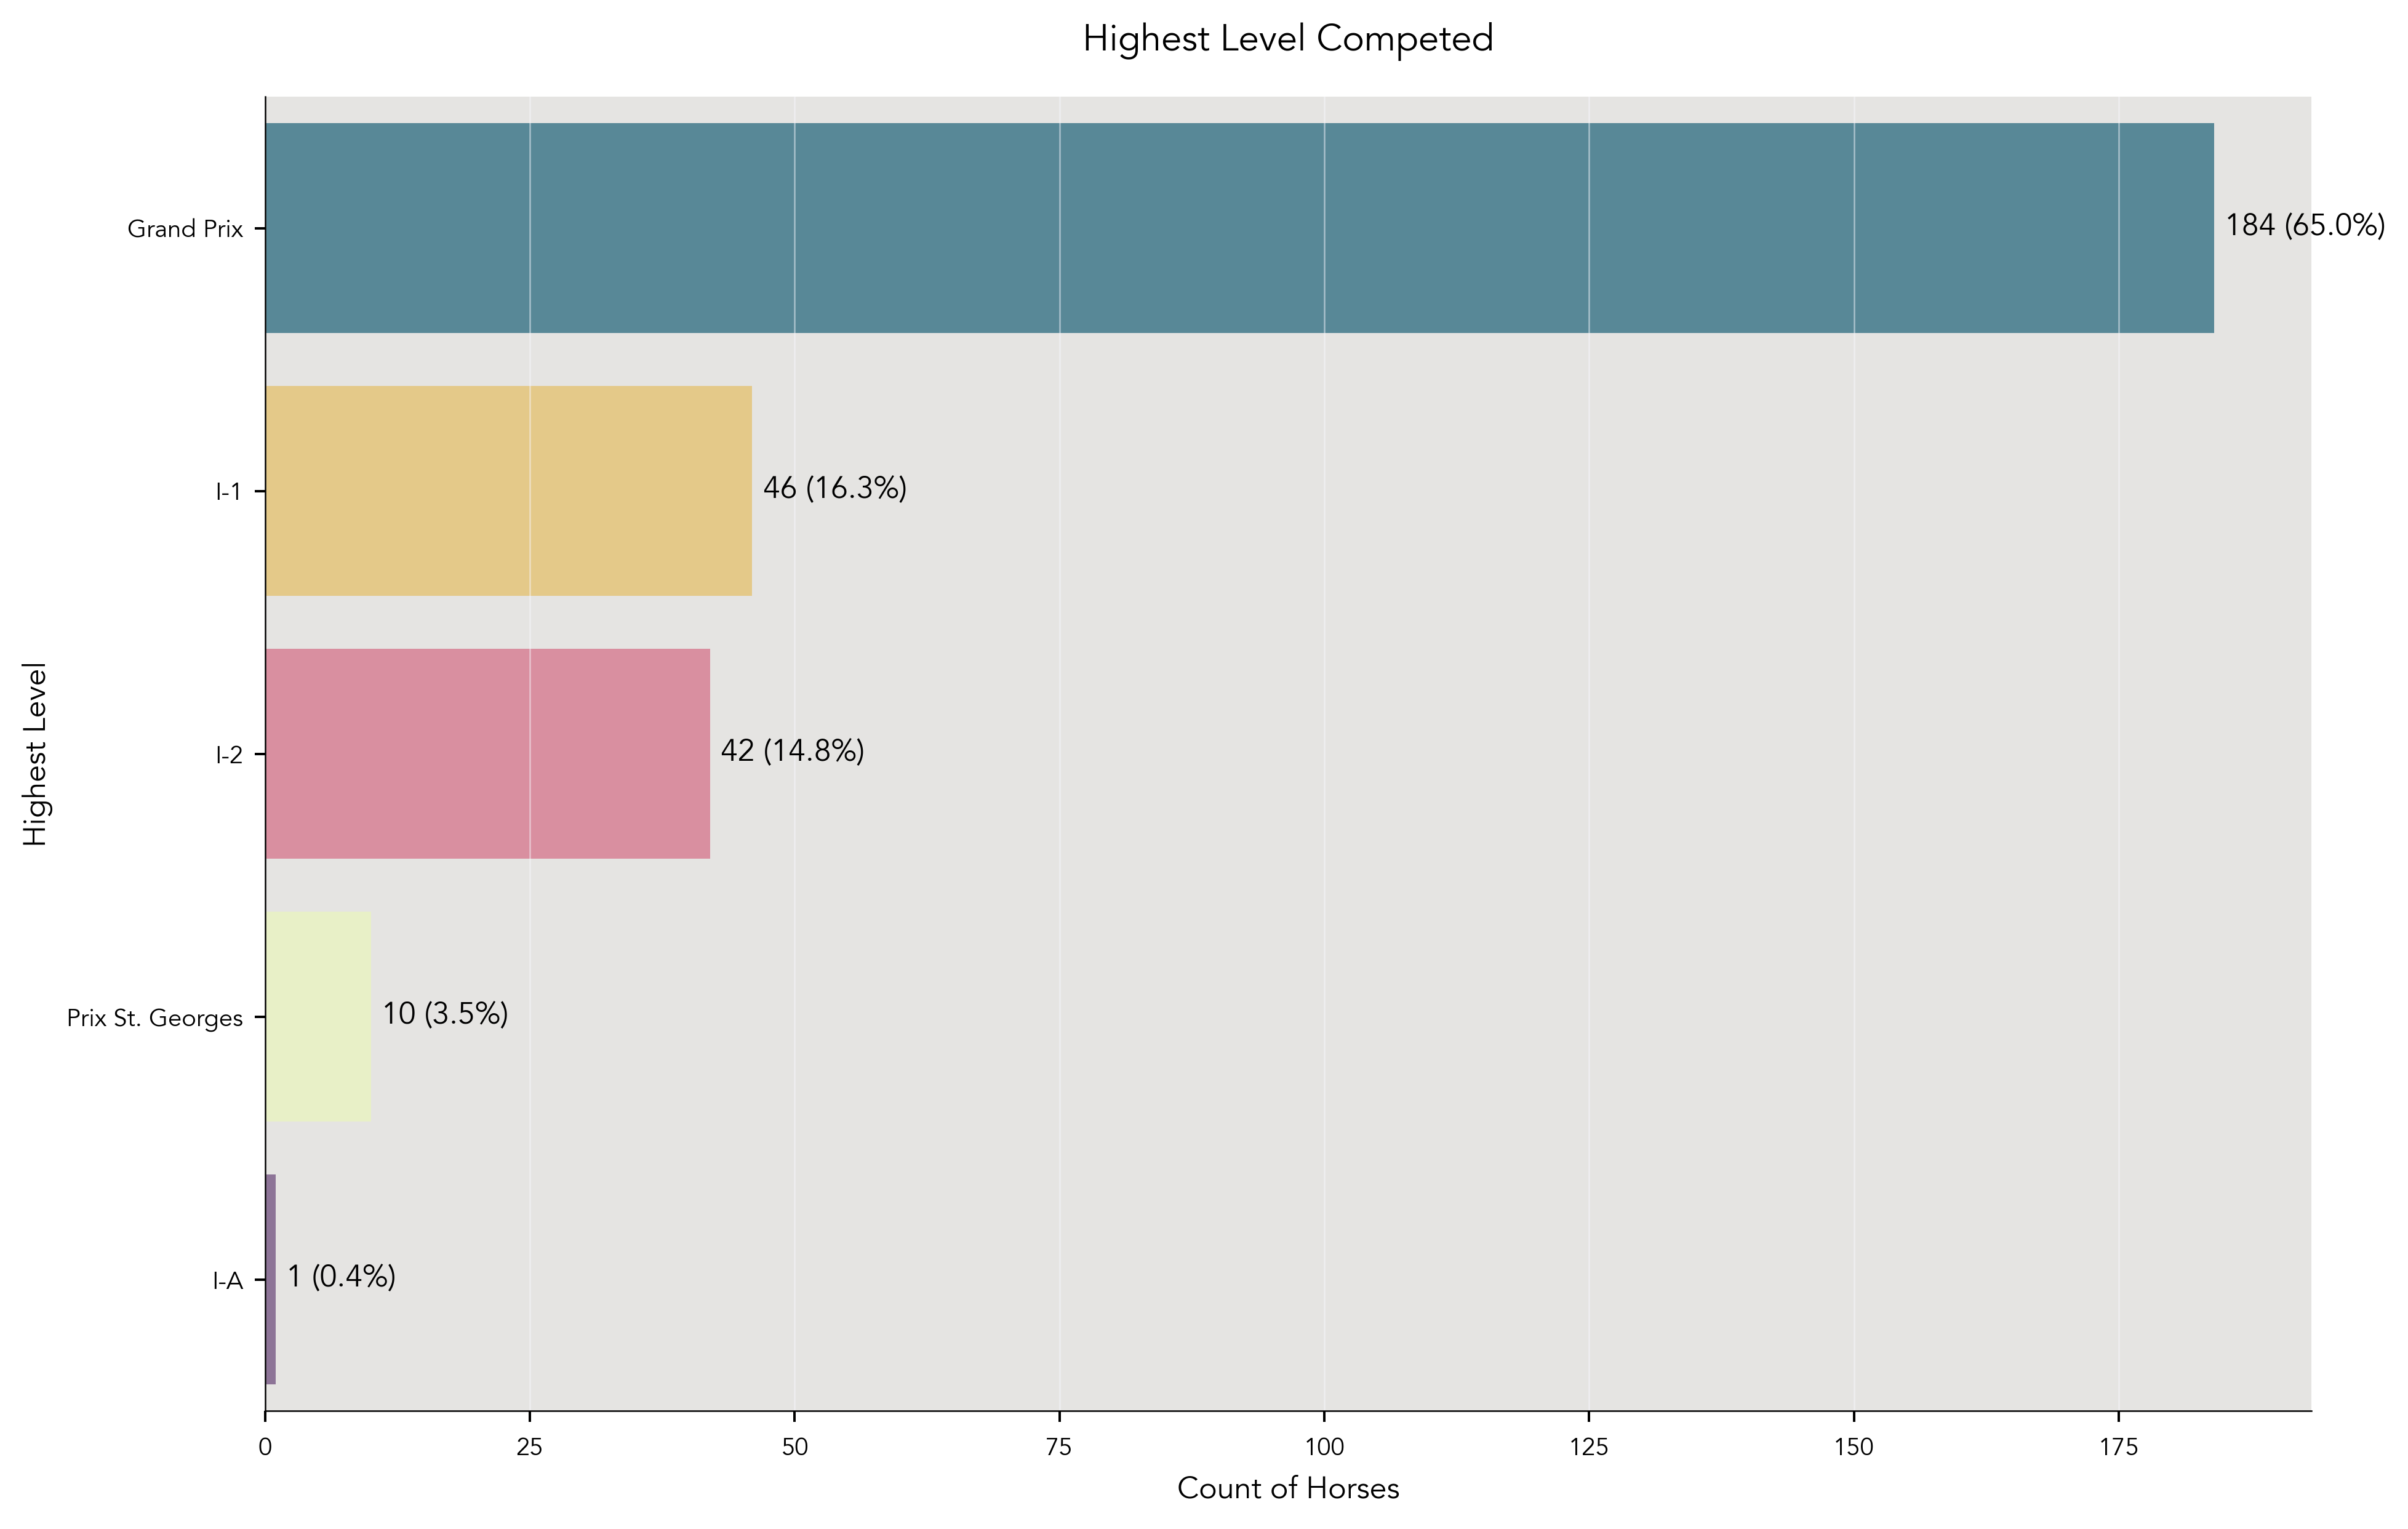

In [81]:
# create a countplot to display the breakdown of highest level competed

# set figure size
ax = plt.subplots(figsize=(11, 7))

# set counplot options
ax = sns.countplot(
   y = 'Highest Level',
   data = total_dev_horses,
   alpha = 0.7,
   order = total_dev_horses['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/dev_horse_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest Level Competed')
plt.xlabel('Count of Horses')
plt.ylabel('Highest Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-highest-level-breakdown.png')
plt.show()

### CDI (Concours de Dressage International) Competitor Statistics

In [69]:
# get the horses that have competed in at least one CDI (any level other than Young Horse divisions)
dev_cdi_horses = total_dev_horses.loc[(total_dev_horses['CDI Competitor'] == 'Yes')]

# count the CDI horses by USDF number
dev_cdi_count = dev_cdi_horses['USDFNumber'].nunique()

print(f"The number of CDI competitors is {dev_cdi_count}.")

The number of CDI competitors is 191.


In [70]:
# get the overall percentage of horses that competed in at least one CDI 
dev_cdi_percentage = (dev_cdi_count / dev_horse_count) * 100

# round the percentage
dev_cdi_percentage = round(dev_cdi_percentage, 2)

# print to console
print(f"The percentage of CDI competitors is {dev_cdi_percentage}%")

The percentage of CDI competitors is 67.49%


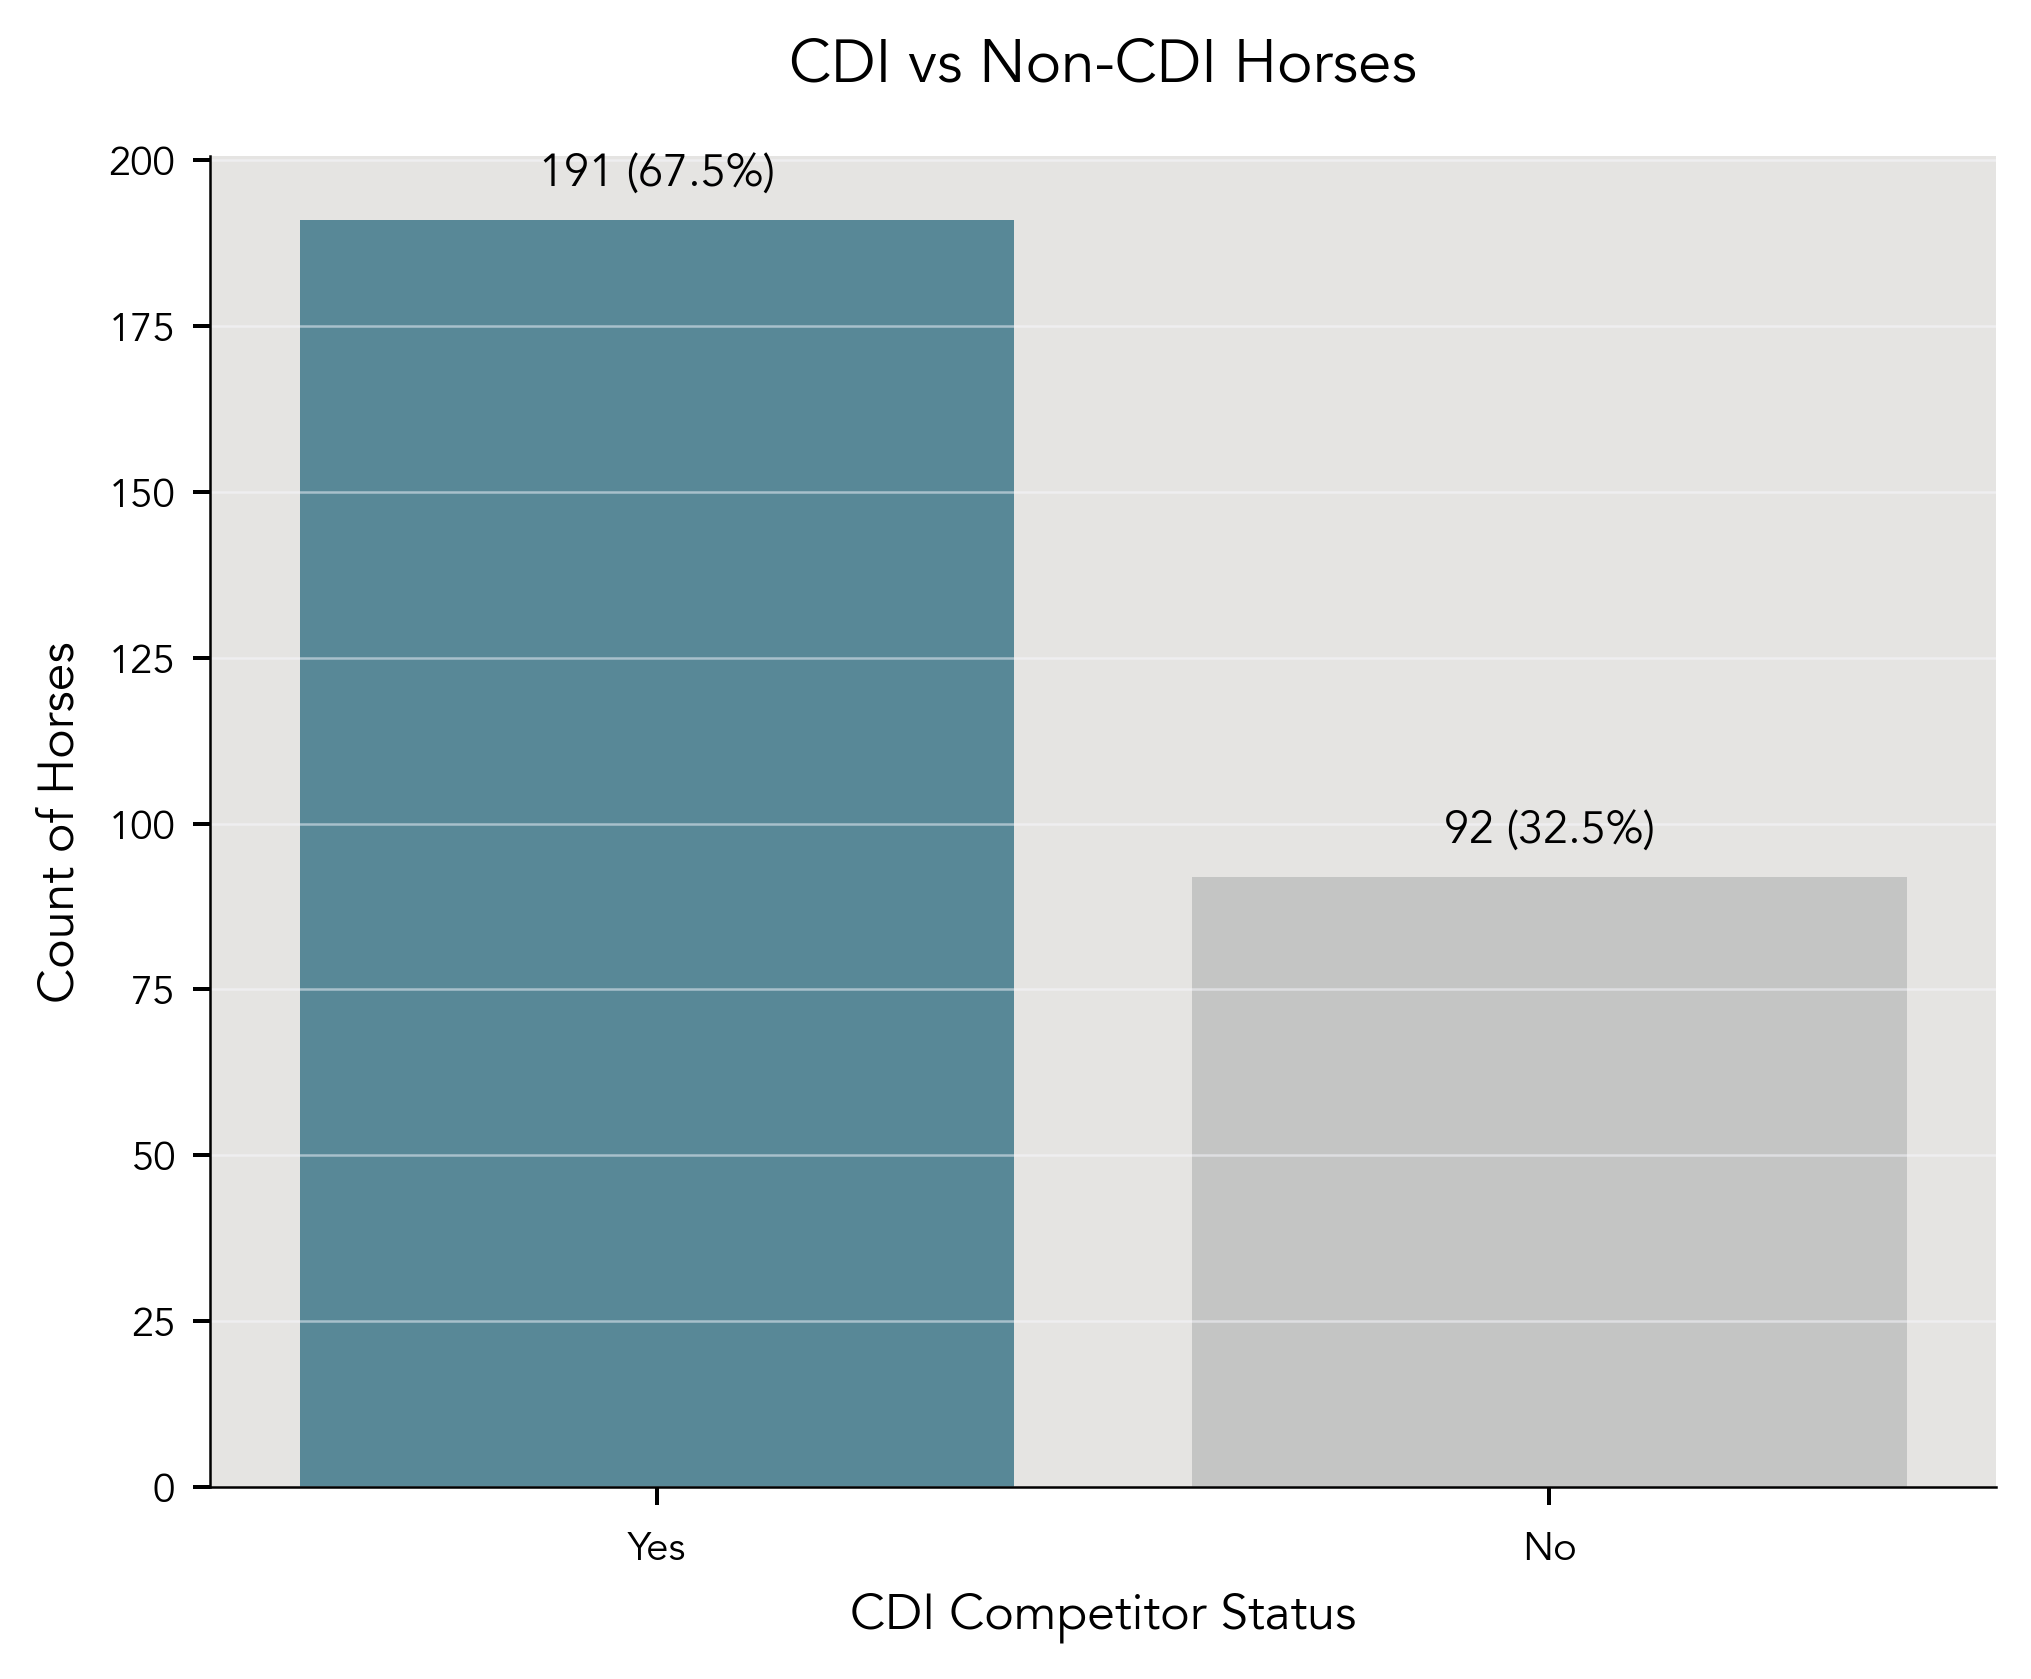

In [71]:
#  create a countplot to visualize CDI vs non-CDI horse data

# set options for countplot
ax = sns.countplot(
   x = 'CDI Competitor',
   data = total_dev_horses,
   palette = ['#0d6a87', '#b7b8b8'],
   alpha = .7,
   order = total_dev_horses['CDI Competitor'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_horse_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('CDI vs Non-CDI Horses')
plt.xlabel('CDI Competitor Status')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/dh-cdi-competitors.png')
plt.show()

### International Team Horse Statistics

In [80]:
# select the horses that went on to make an international team (Pan American, World Equestrian, or Olympic Games) 
dev_team_df = total_dev_horses[(total_dev_horses['InternationalTeam'] == 'Yes')]


# drop unnecessary columns
dev_team_df = dev_team_df.drop(columns =['CDI Competitor', 'USDFNumber', 'Highest Level', 'InternationalTeam'])

# show dataframe
dev_team_df

# print to markdown
print(dev_team_df.to_markdown())

|      |   Year | Division   | Horse        |   OverallPlacing |   OverallScore | Sire        | Damsire             | Country Bred   | Breeder           | Studbook   | Team Made                            |
|-----:|-------:|:-----------|:-------------|-----------------:|---------------:|:------------|:--------------------|:---------------|:------------------|:-----------|:-------------------------------------|
|  167 |   2008 | DHPSG      | Grandioso    |                3 |         67.969 | Grosso Z    | Palisandergrund     | Germany        | Willi Hillebrecht | Westfalen  | Pan American Games                   |
|  333 |   2010 | DHPSG      | Rosevelt     |                5 |         66.874 | Rotspon     | Lauries Crusador xx | Germany        | Henry Peters      | Hanoverian | Olympic Games                        |
|  400 |   2014 | DHPSG      | Sanceo       |                1 |         76.515 | San Remo    | Ramiro's Son II     | Germany        | Gerhard Dustmann  | Hanoverian | Olym

In [73]:
# get the percentage of horses that made an international team

# get the count of team horses
dev_team_count = len(dev_team_df)

# calculate the percentage
dev_team_percentage = (dev_team_count / dev_horse_count) * 100

# round the percentage
dev_team_percentage = round(dev_team_percentage, 1)

# print to console
print(f"The percentage of horses that made an international team is {dev_team_percentage}%")

The percentage of horses that made an international team is 2.1%


In [74]:

dev_scores_df = merged_df.loc[(merged_df['Year'] <= 2023) &
                            (merged_df['Division'].str.contains('DHPSG|DHGP')) & (merged_df['Highest Level'] == 'Grand Prix')]


#ax = plt.subplots(figsize=(11, 8))

# write a function to evaluate if score is equal to/over 7.5 or not
def check_score(score):
    if score >= 65.9:
        return '65.9 or Over'
    else:
        return 'Under 65.9'


# new column with result of function  
dev_scores_df['ScoreRank'] = dev_scores_df['OverallScore'].apply(check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 65.9 that we keep the higher score
dev_scores_df = dev_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

print(dev_scores_df.to_markdown())


dev_gp_count = len(dev_scores_df)

|      |   Year | Division   | Horse                       |   OverallPlacing |   USDFNumber |   OverallScore | Highest Level   | CDI Competitor   | Sire                  | Damsire             | Country Bred   | Breeder                               | Studbook             | InternationalTeam   | Team Made                            | ScoreRank    |
|-----:|-------:|:-----------|:----------------------------|-----------------:|-------------:|---------------:|:----------------|:-----------------|:----------------------|:--------------------|:---------------|:--------------------------------------|:---------------------|:--------------------|:-------------------------------------|:-------------|
|  458 |   2013 | DHPSG      | Zania                       |                7 |      1070709 |         66.577 | Grand Prix      | Yes              | Sir Sinclair          | Hierarch            | Netherlands    | B.J. Odink                            | KWPN                 | No                  | n

/var/folders/7n/mspq2xwj6yz13bx09w_kdbzc0000gn/T/ipykernel_4157/2800724017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_scores_df['ScoreRank'] = dev_scores_df['OverallScore'].apply(check_score)


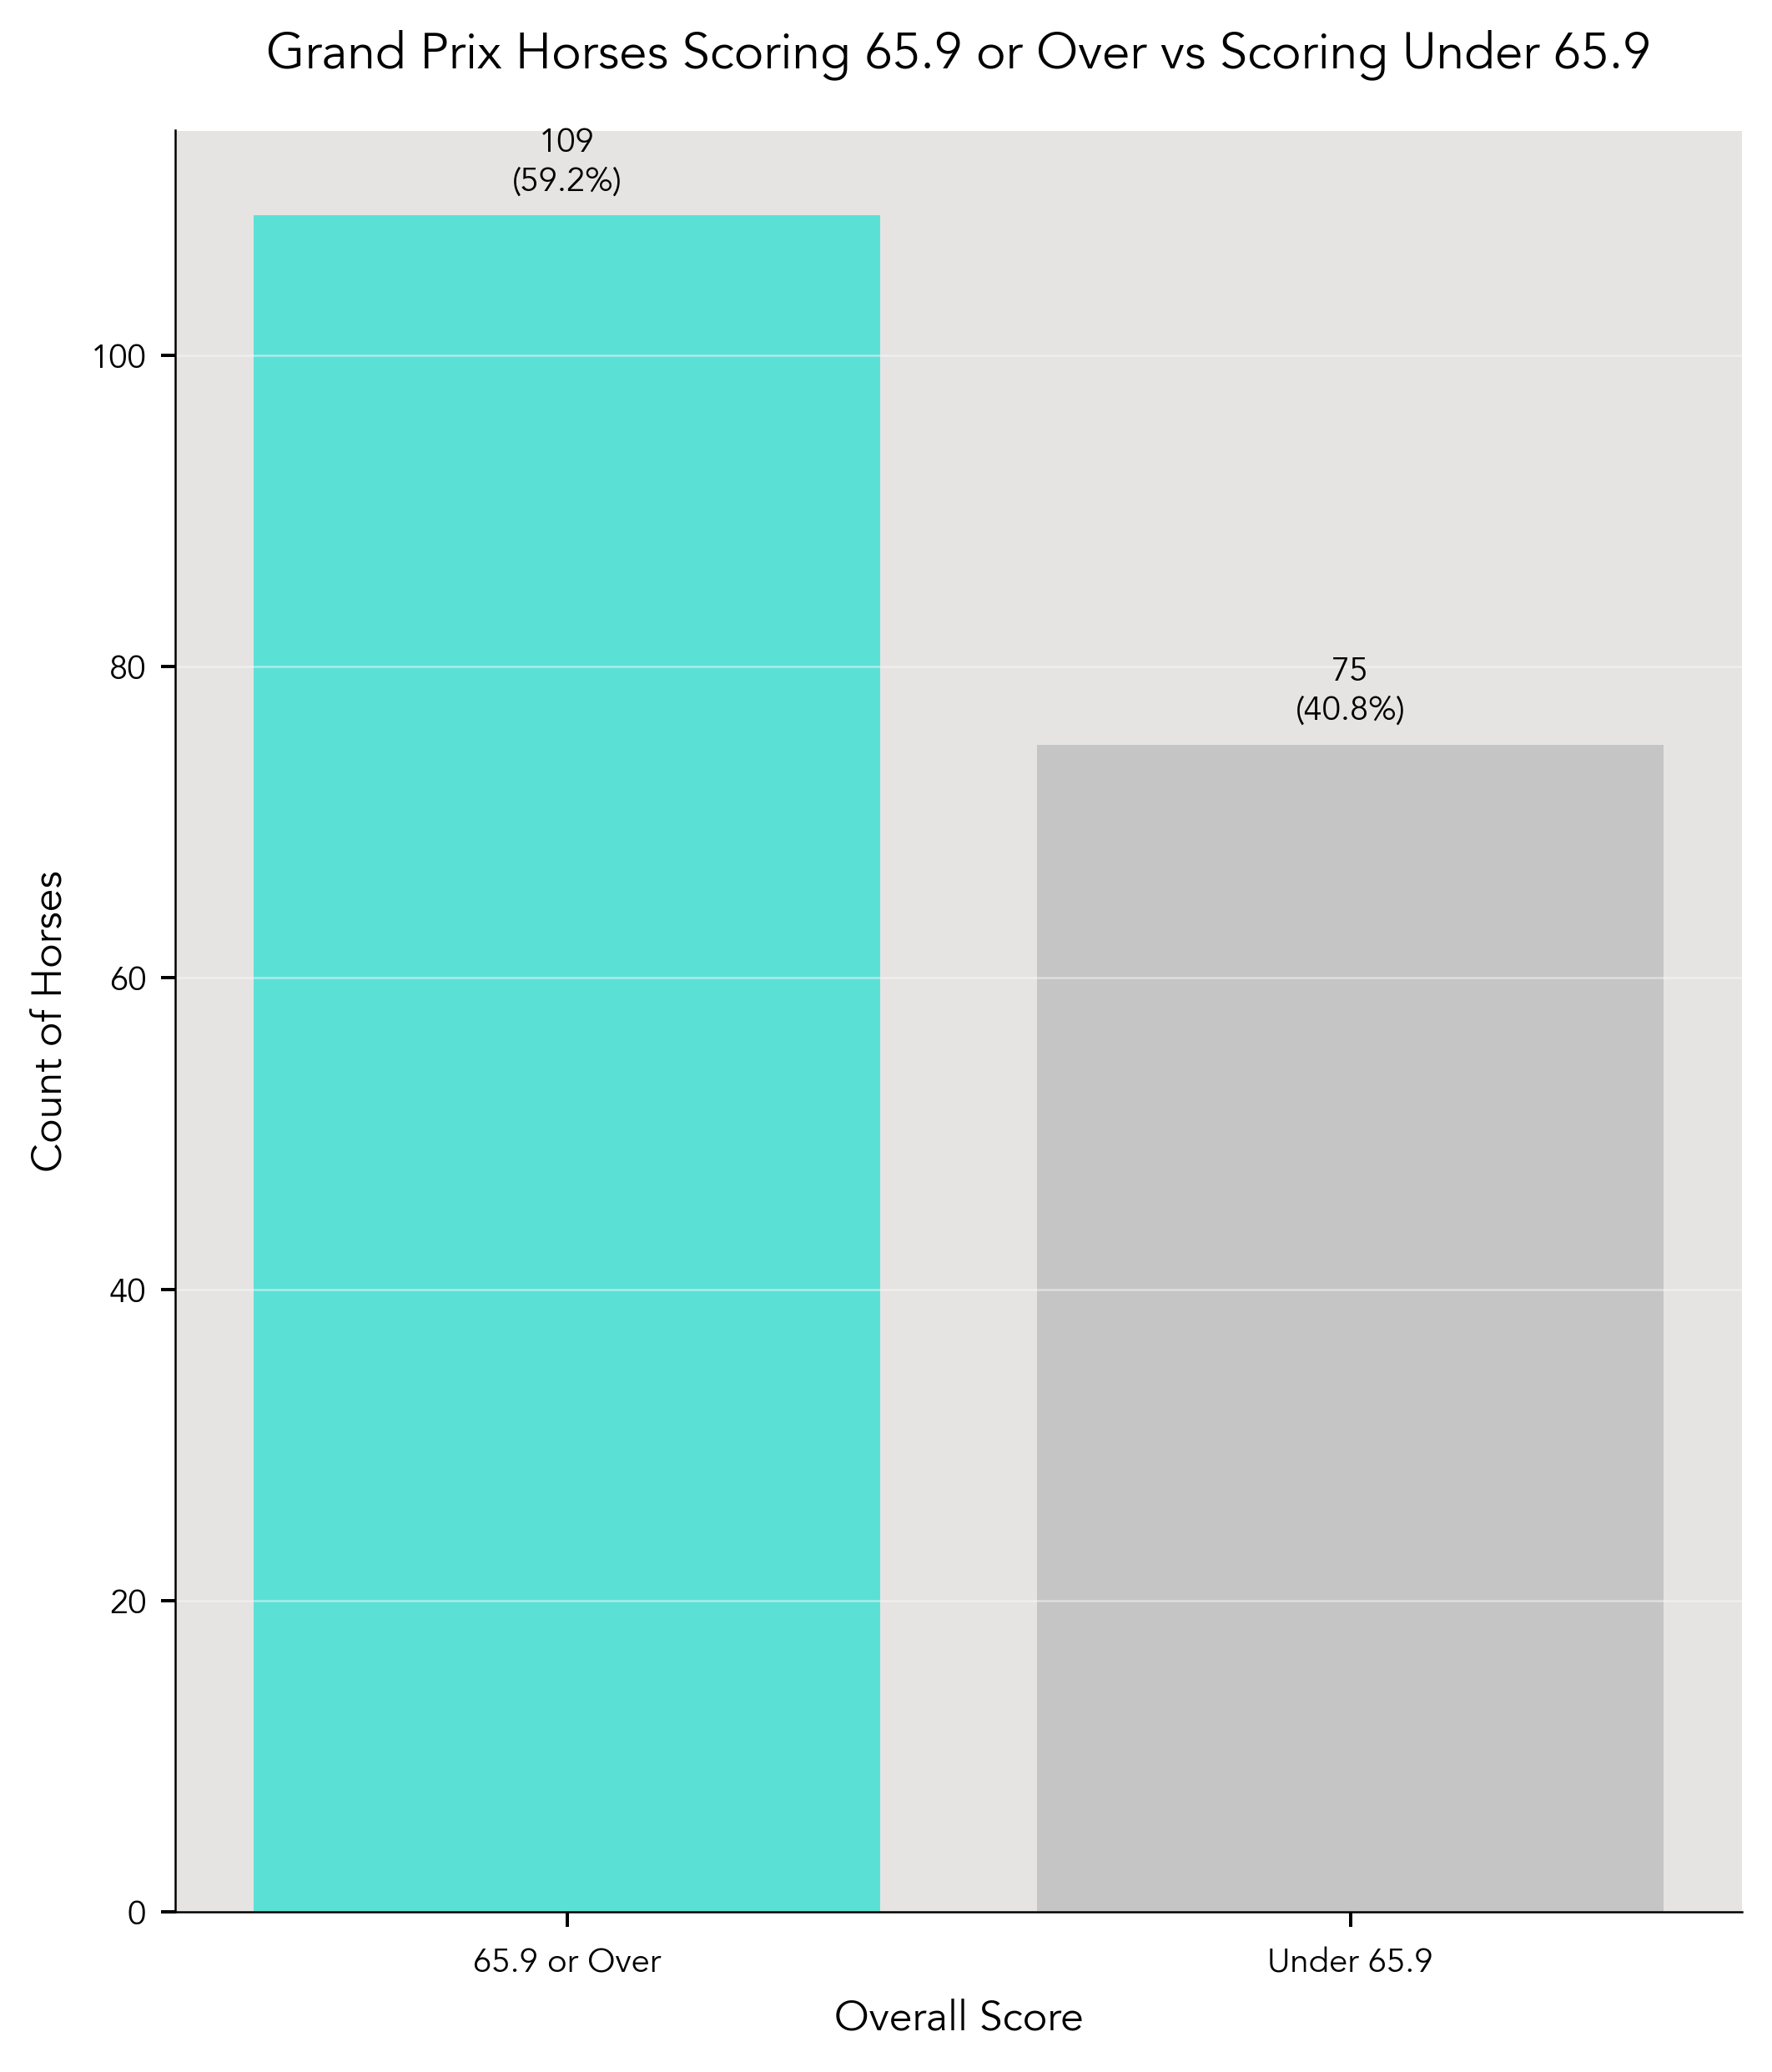

In [75]:
ax = plt.subplots(figsize=(6, 7))

# set options for countplot
ax = sns.countplot(
   x = 'ScoreRank',
   data = dev_scores_df,
   palette = ['#00ffee', '#b7b8b8'],
   alpha = .7,
   order = dev_scores_df['ScoreRank'].value_counts().index
)

# add annotation for count and percentage of each score group
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_gp_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Grand Prix Horses Scoring 65.9 or Over vs Scoring Under 65.9')
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-grand-prix-by-overall-score.png')
plt.show()

In [77]:
chi_dev_scores_df = merged_df.loc[(merged_df['Year'] <= 2023) &
                            (merged_df['Division'].str.contains('DHPSG|DHGP'))]


# write a function to evaluate if placing the horse competed at GP or not
def gp_or_no(level):
    if level == 'Grand Prix':
        return 'Yes'
    else:
        return 'No'

# new column with result of function  
chi_dev_scores_df['IsGP'] = chi_dev_scores_df['Highest Level'].apply(gp_or_no)    

# new column with result of function  
chi_dev_scores_df['ScoreRank'] = chi_dev_scores_df['OverallScore'].apply(check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 65.9 that we keep the higher score
chi_dev_scores_df = chi_dev_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

print(chi_dev_scores_df.to_markdown())

|      |   Year | Division   | Horse                       |   OverallPlacing |   USDFNumber |   OverallScore | Highest Level    | CDI Competitor   | Sire                  | Damsire                    | Country Bred   | Breeder                               | Studbook                                                | InternationalTeam   | Team Made                            | IsGP   | ScoreRank    |
|-----:|-------:|:-----------|:----------------------------|-----------------:|-------------:|---------------:|:-----------------|:-----------------|:----------------------|:---------------------------|:---------------|:--------------------------------------|:--------------------------------------------------------|:--------------------|:-------------------------------------|:-------|:-------------|
|  613 |   2018 | DHPSG      | Davos MCF                   |               11 |      1104371 |         67.892 | I-1              | No               | Don Frederico         | Roadster            

/var/folders/7n/mspq2xwj6yz13bx09w_kdbzc0000gn/T/ipykernel_4157/204690177.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_dev_scores_df['IsGP'] = chi_dev_scores_df['Highest Level'].apply(gp_or_no)
/var/folders/7n/mspq2xwj6yz13bx09w_kdbzc0000gn/T/ipykernel_4157/204690177.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_dev_scores_df['ScoreRank'] = chi_dev_scores_df['OverallScore'].apply(check_score)


In [78]:
# create contingency table
contingency_table = pd.crosstab(chi_dev_scores_df['ScoreRank'], chi_dev_scores_df['IsGP'])

print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

IsGP          No  Yes
ScoreRank            
65.9 or Over  66  109
Under 65.9    33   75
Chi-Square statistic: 1.2064753433518522
P-Value: 0.2720312962380293
Degrees of Freedom: 1
Expected Frequencies: [[ 61.21908127 113.78091873]
 [ 37.78091873  70.21908127]]
p value is 0.2720312962380293
Independent (H0 holds true)
